## 1. Import Libraries

Python 3.11.5

**Library versions:**

* matplotlib==3.8.0

* numpy==1.26.0

* pandas==2.1.1

* scikit-learn==1.3.1
 
* seaborn==0.13.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


print("Libraries imported successfully yay!")

Libraries imported successfully yay!


## 2. Initial Dataset Understanding

### 2.1 Read dataset

In [2]:
df = pd.read_csv('./data/diabetes_binary_health_indicators_BRFSS2015.csv')

### 2.2. Basic Dataset Information

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


### 2.3 Data Cleaning

#### 2.3.1 Transform the data to integer values

In [7]:
df['Age']=df['Age'].astype('int64')
df['Education']=df['Education'].astype('int64')
df['Income']=df['Income'].astype('int64')
df['BMI']=df['BMI'].astype('int64')
df['CholCheck']=df['CholCheck'].astype('int64')
df['Smoker']=df['Smoker'].astype('int64')
df['Stroke']=df['Stroke'].astype('int64')
df['HeartDiseaseorAttack']=df['HeartDiseaseorAttack'].astype('int64')
df['PhysActivity']=df['PhysActivity'].astype('int64')
df['Fruits']=df['Fruits'].astype('int64')
df['Veggies']=df['Veggies'].astype('int64')
df['HvyAlcoholConsump']=df['HvyAlcoholConsump'].astype('int64')
df['AnyHealthcare']=df['AnyHealthcare'].astype('int64')
df['NoDocbcCost']=df['NoDocbcCost'].astype('int64')
df['GenHlth']=df['GenHlth'].astype('int64')
df['MentHlth']=df['MentHlth'].astype('int64')
df['PhysHlth']=df['PhysHlth'].astype('int64')
df['DiffWalk']=df['DiffWalk'].astype('int64')
df['Sex']=df['Sex'].astype('int64')
df['Diabetes_binary']=df['Diabetes_binary'].astype('int64')
df['HighBP']=df['HighBP'].astype('int64')
df['HighChol']=df['HighChol'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

#### 2.3.2 Check for missing data (null values)

In [9]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### 2.3.3 Check for duplicated data and remove duplicates

In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"There are: {duplicates} duplicates in {df.shape[0]} data points.")

# Percentage of duplicates compared to toal
dupps_percent = (duplicates / df.shape[0]) * 100
print(f"Duplicates amount {dupps_percent:.2f}% of the dataset")

# Remove duplicates
df.drop_duplicates(inplace=True)

There are: 24206 duplicates in 253680 data points.
Duplicates amount 9.54% of the dataset


#### 2.3.4 Get dataset information on rows x columns

In [11]:
df.shape

(229474, 22)

#### 2.3.5 Check number of unique values in different features

In [12]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

unique_values_df = pd.DataFrame(unique_values, index=['# Unique Values']).transpose().sort_values(by='# Unique Values',ascending=False)

unique_values_df

# show none binary features
non_bin_features = unique_values_df[unique_values_df['# Unique Values'] > 2]
print(f"# of non binary features: {non_bin_features.shape[0]}")
print(f"{unique_values_df[unique_values_df['# Unique Values'] > 2]}")

# of non binary features: 7
           # Unique Values
BMI                     84
PhysHlth                31
MentHlth                31
Age                     13
Income                   8
Education                6
GenHlth                  5


#### 2.3.6 Rename target variable name

In [13]:
df = df.rename(columns={'Diabetes_binary': 'Diabetes'})

## 2.3 EDA - Exploratory Data Analysis

### 2.3.1 Stacked Bar Chart Analysis of Features vs. Diabetes

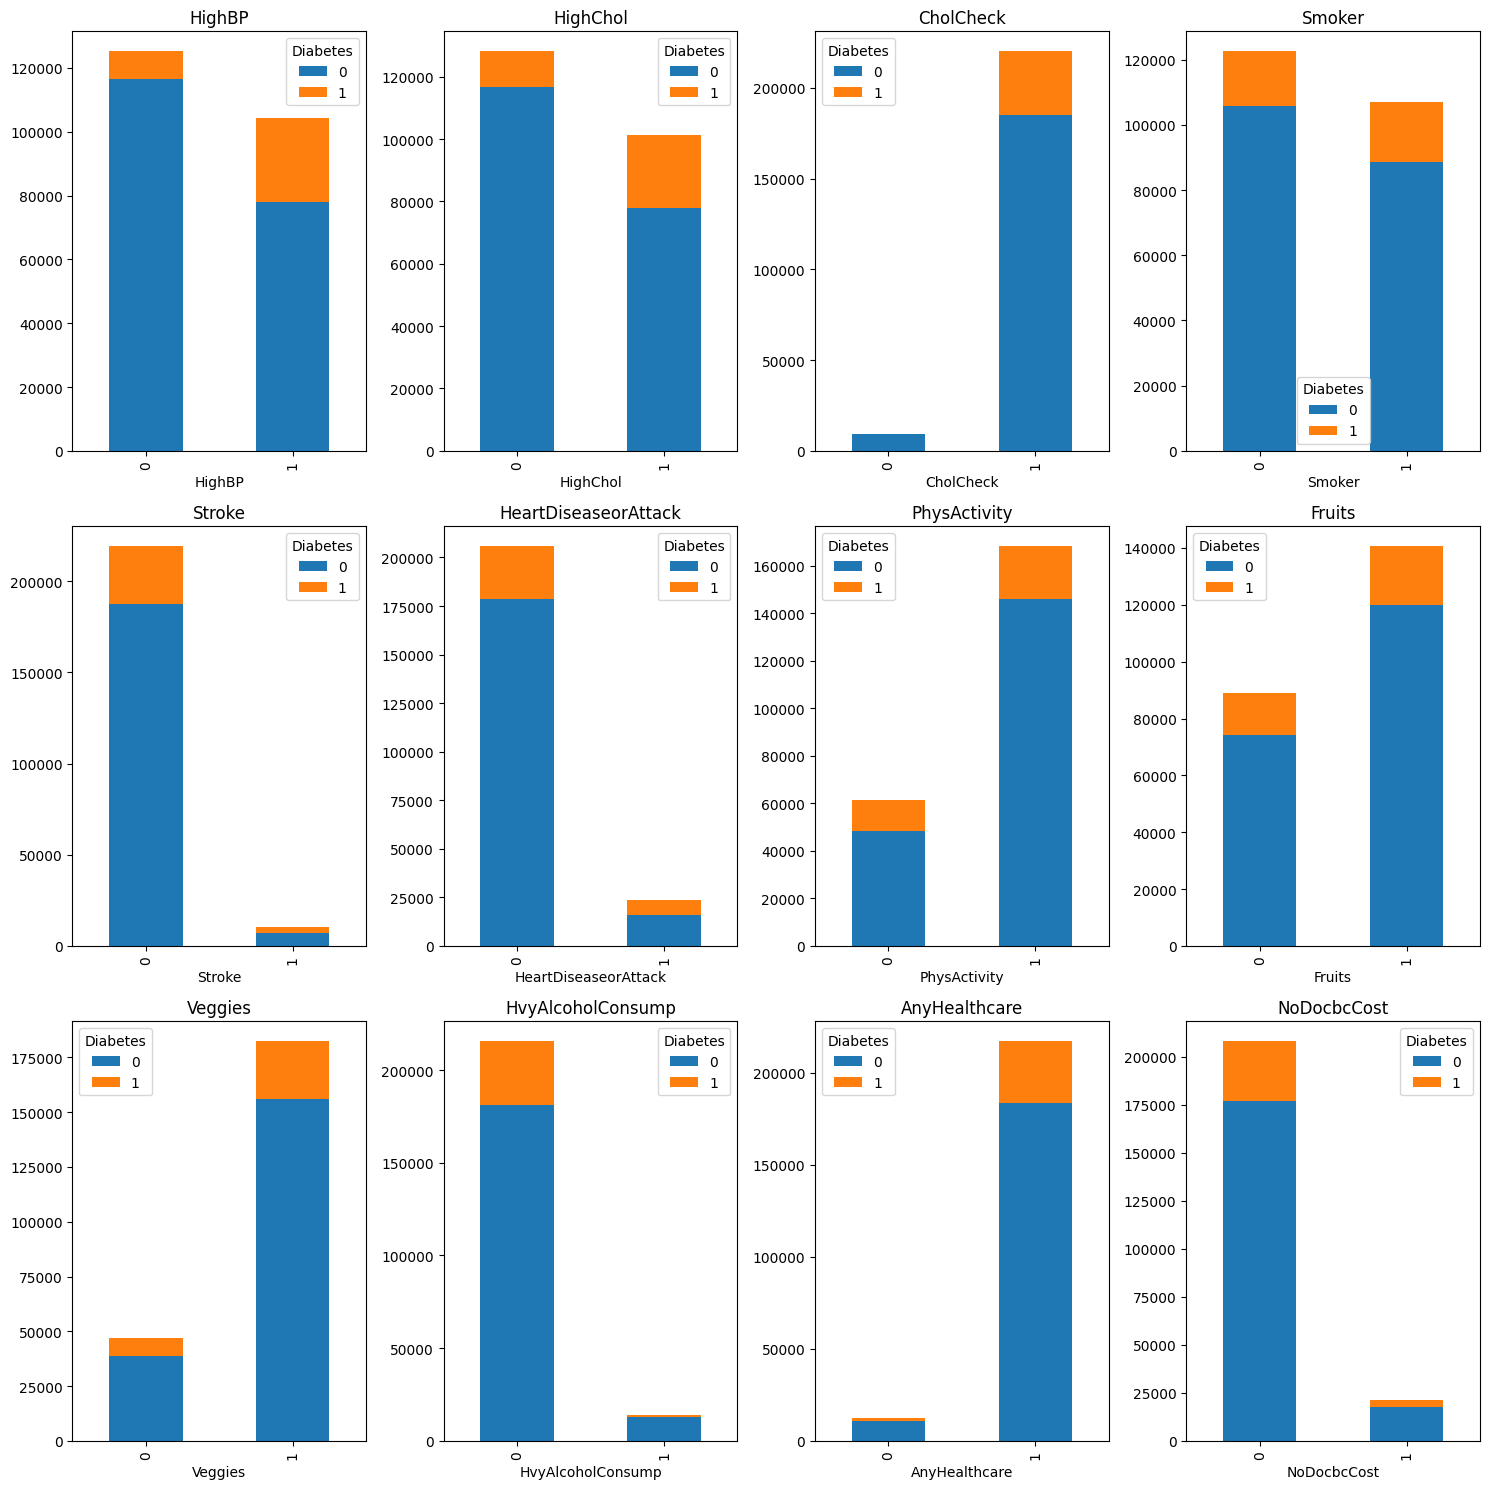

In [14]:
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

import matplotlib.pyplot as plt

def create_pivot(data, column):
    return data.groupby([column, 'Diabetes']).size().unstack(fill_value=0)

def plot_stacked_bars(data, columns):
    _, axes = plt.subplots(3, 4, figsize=(15, 15))
    axes = axes.ravel()

    for i, col in enumerate(columns):
        if i >= len(axes):
            break
        create_pivot(data, col).plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel(col)

    # Turn off unused subplots
    for ax in axes[len(columns):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_stacked_bars(df, binary_cols)


### 2.3.2 Target Distribution across the dataset

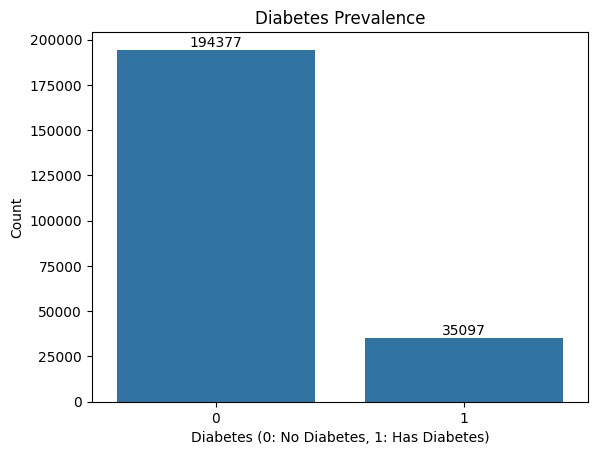

In [15]:
sns.countplot(x='Diabetes', data=df)
plt.title('Diabetes Prevalence')
plt.xlabel('Diabetes (0: No Diabetes, 1: Has Diabetes)')
plt.ylabel('Count')

for bar in plt.gca().containers:
    plt.gca().bar_label(bar)
plt.show()

Percentage of people with diabetes and people with no diabetes:

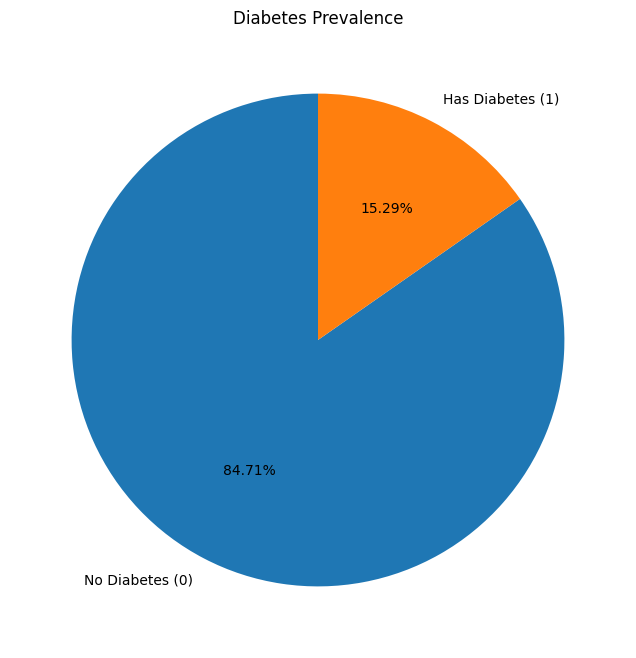

In [16]:
diabetes_counts = df['Diabetes'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    diabetes_counts, 
    labels=['No Diabetes (0)', 'Has Diabetes (1)'], 
    autopct='%.02f%%',
    startangle=90, 
)
plt.title('Diabetes Prevalence')
plt.show()

There are more people without diabetes than people with diabetes.

### 2.3.3 Diabetes Prevalence by Gender

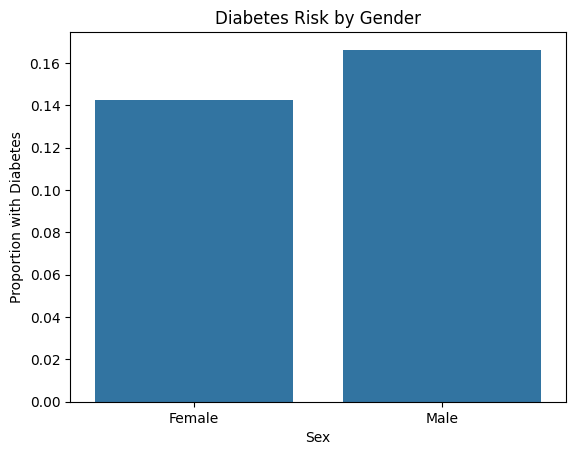

In [17]:
df_plot = df.copy()
df_plot['Sex'] = df_plot['Sex'].replace({1: 'Male', 0: 'Female'})

sns.barplot(x='Sex', y='Diabetes', data=df_plot, errorbar=None)
plt.title('Diabetes Risk by Gender')
plt.ylabel('Proportion with Diabetes')
plt.show()

### 2.3.4 Diabetes Prevalence by Age Categories

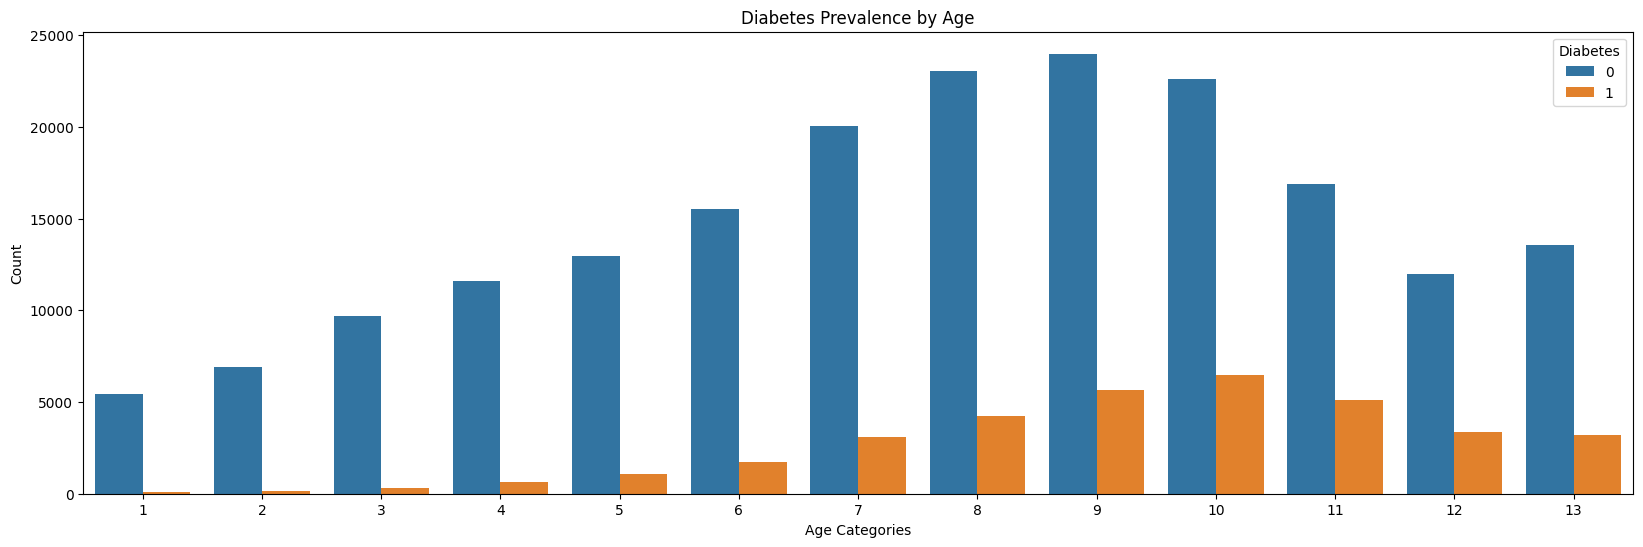

Age category with the highest number of people with diabetes: 10 (65-69 years old) with a total of 6483 people.


In [18]:
# Age Categories Mapping
age_category_map = {
    1: '18-24', 
    2: '25-29', 
    3: '30-34', 
    4: '35-39', 
    5: '40-44',
    6: '45-49', 
    7: '50-54', 
    8: '55-59', 
    9: '60-64', 
    10: '65-69', 
    11: '70-74', 
    12: '75-79', 
    13: '80+'
}

# Countplot 
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', hue='Diabetes', data=df, order=range(1, 14))
plt.title('Diabetes Prevalence by Age')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

# Consider only people with diabetes (Diabetes = 1)
df_diabetes = df[df['Diabetes'] == 1]

# Calculate the total count per age category
age_category_count_diabetes = df_diabetes['Age'].value_counts().sort_index()

# Find the age category with the highest count for people with diabetes
max_age_category_diabetes = age_category_count_diabetes.idxmax()
max_count_diabetes = age_category_count_diabetes.max()

max_age_group_diabetes = age_category_map[max_age_category_diabetes]

print(f"Age category with the highest number of people with diabetes: {max_age_category_diabetes} ({max_age_group_diabetes} years old) with a total of {max_count_diabetes} people.")


As age increases so does the diabetes diagnostic in people. 

### 2.3.5 Diabetes Prevalence in Males

In [19]:
# Data for males with diabetes
df_males = df[(df['Sex'] == 1)]

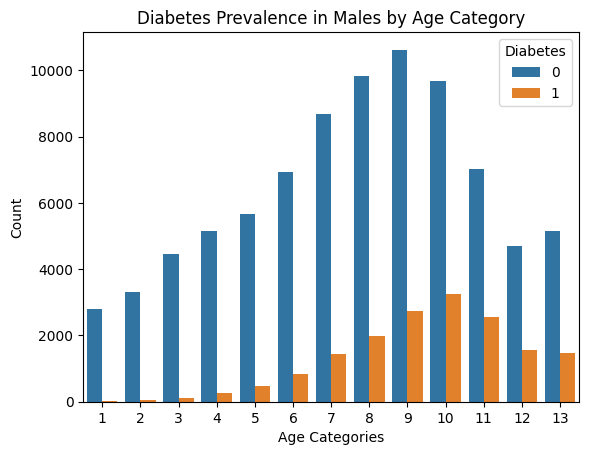

Age category with the highest number of people with diabetes: 10 (65-69 years old) with a total of 3263 people.


In [20]:
# Countplot 
sns.countplot(x='Age', hue='Diabetes', data=df_males, order=range(1, 14))
plt.title('Diabetes Prevalence in Males by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

df_males_diabetes = df_males[df_males['Diabetes'] == 1]

age_category_count_male_diabetes = df_males_diabetes['Age'].value_counts().sort_index()

max_age_category_male_diabetes = age_category_count_male_diabetes.idxmax()
max_count_male_diabetes = age_category_count_male_diabetes.max()

max_age_group_male_diabetes = age_category_map[max_age_category_male_diabetes]

print(f"Age category with the highest number of people with diabetes: {max_age_category_male_diabetes} ({max_age_group_male_diabetes} years old) with a total of {max_count_male_diabetes} people.")

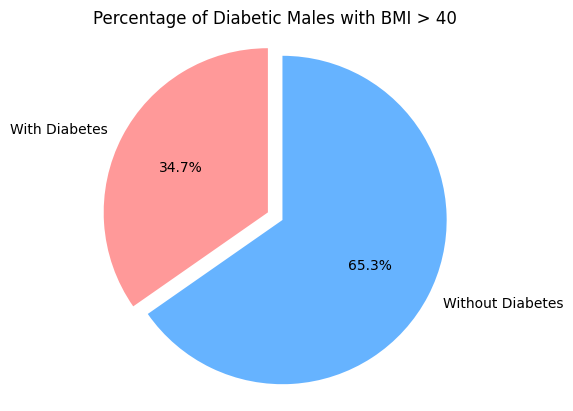

Percentage diabetic males with BMI > 40: 34.7%


In [21]:
df_males_bmi_above_40 = df[(df['Sex'] == 1) & (df['BMI'] > 40)]

# Calculate the count of males with diabetes (Diabetes == 1) and without diabetes (Diabetes == 0)
diabetes_count = df_males_bmi_above_40['Diabetes'].value_counts()

# Calculate the percentage of males with BMI > 40 who have diabetes
diabetes_percentage = (diabetes_count.get(1, 0) / len(df_males_bmi_above_40)) * 100
no_diabetes_percentage = 100 - diabetes_percentage

# Create a pie chart (circle plot)
labels = ['With Diabetes', 'Without Diabetes']
sizes = [diabetes_percentage, no_diabetes_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetic Males with BMI > 40')
plt.axis('equal')  
plt.show()

print(f"Percentage diabetic males with BMI > 40: {diabetes_percentage:.1f}%")

### 2.3.6 Diabetes Prevalence in Females

In [22]:
# Stats for females with diabetes
df_females = df[(df['Sex'] == 0)]

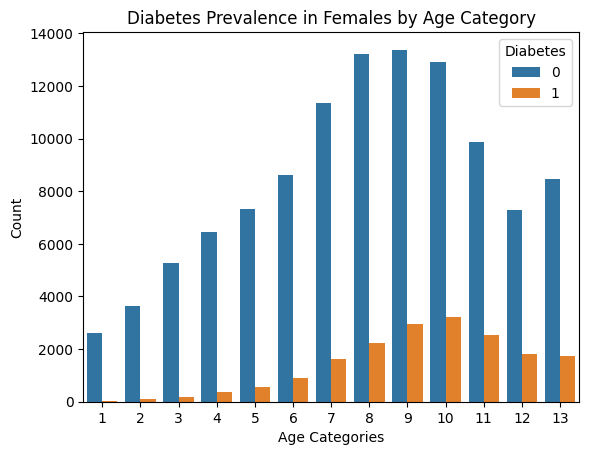

Age category with the highest number of people with diabetes: 10 (65-69 years old) with a total of 3220 people.


In [23]:
# Countplot 
sns.countplot(x='Age', hue='Diabetes', data=df_females, order=range(1, 14))
plt.title('Diabetes Prevalence in Females by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

df_females_diabetes = df_females[df_females['Diabetes'] == 1]

age_category_count_female_diabetes = df_females_diabetes['Age'].value_counts().sort_index()

max_age_category_female_diabetes = age_category_count_female_diabetes.idxmax()
max_count_female_diabetes = age_category_count_female_diabetes.max()

max_age_group_female_diabetes = age_category_map[max_age_category_female_diabetes]

print(f"Age category with the highest number of people with diabetes: {max_age_category_female_diabetes} ({max_age_group_female_diabetes} years old) with a total of {max_count_female_diabetes} people.")

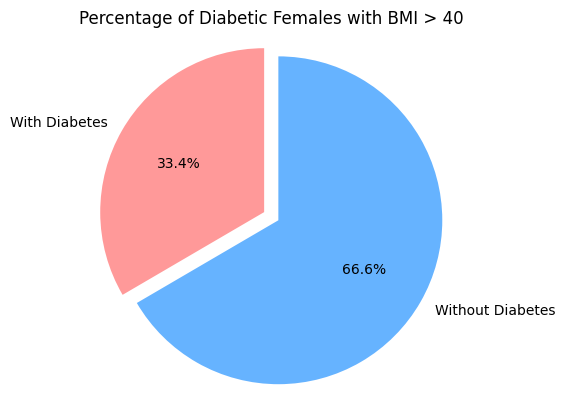

Percentage diabetic females with BMI > 40: 33.4%


In [24]:
df_females_bmi_above_40 = df[(df['Sex'] == 0) & (df['BMI'] > 40)]

# Calculate the count of females with diabetes (Diabetes == 1) and without diabetes (Diabetes == 0)
diabetes_count = df_females_bmi_above_40['Diabetes'].value_counts()

# Calculate the percentage of females with BMI > 40 who have diabetes
diabetes_percentage = (diabetes_count.get(1, 0) / len(df_females_bmi_above_40)) * 100
no_diabetes_percentage = 100 - diabetes_percentage

# Create a pie chart (circle plot)
labels = ['With Diabetes', 'Without Diabetes']
sizes = [diabetes_percentage, no_diabetes_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetic Females with BMI > 40')
plt.axis('equal')  
plt.show()

print(f"Percentage diabetic females with BMI > 40: {diabetes_percentage:.1f}%")

### 2.3.7 Diabetes and Risk Factors Analysis

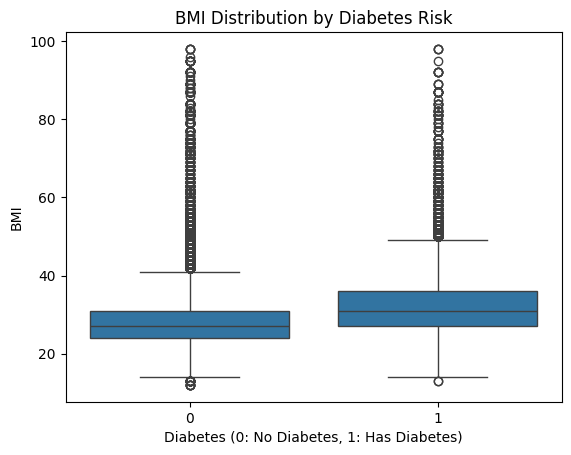

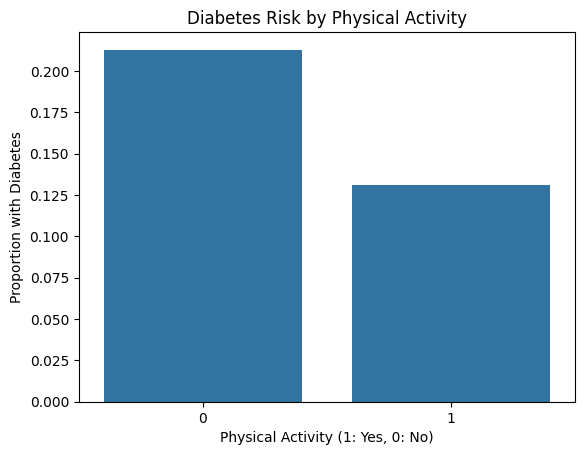

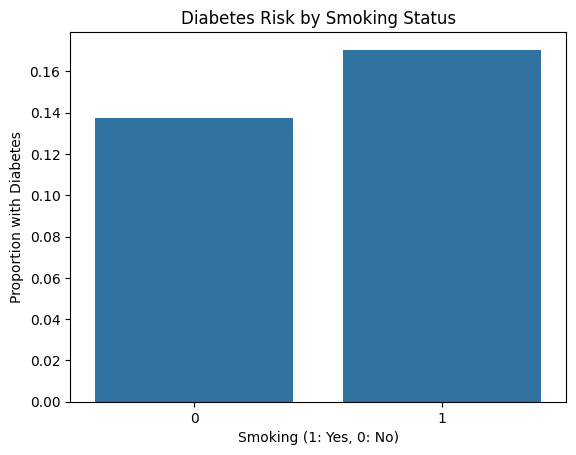

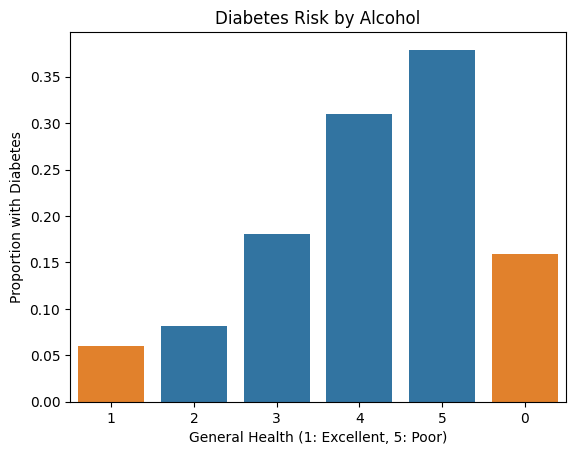

In [35]:
# BMI Analysis
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Risk')
plt.xlabel('Diabetes (0: No Diabetes, 1: Has Diabetes)')
plt.ylabel('BMI')
plt.show()

# Impact of Physical Activity and Diabetes
sns.barplot(x='PhysActivity', y='Diabetes', data=df, errorbar=None)
plt.title('Diabetes Risk by Physical Activity')
plt.xlabel('Physical Activity (1: Yes, 0: No)')
plt.ylabel('Proportion with Diabetes')
plt.show()

# Impact of Smoking and Diabetes 
sns.barplot(x='Smoker', y='Diabetes', data=df, errorbar=None)
plt.title('Diabetes Risk by Smoking Status')
plt.xlabel('Smoking (1: Yes, 0: No)')
plt.ylabel('Proportion with Diabetes')
plt.show()

# Impact of General Health Status and Diabetes
sns.barplot(x='GenHlth', y='Diabetes', data=df, errorbar=None)
plt.title('Diabetes Risk by General Health')
plt.xlabel('General Health (1: Excellent, 5: Poor)')
plt.ylabel('Proportion with Diabetes')

plt.show()


### 2.3.8 Education Feature vs. Diabetes

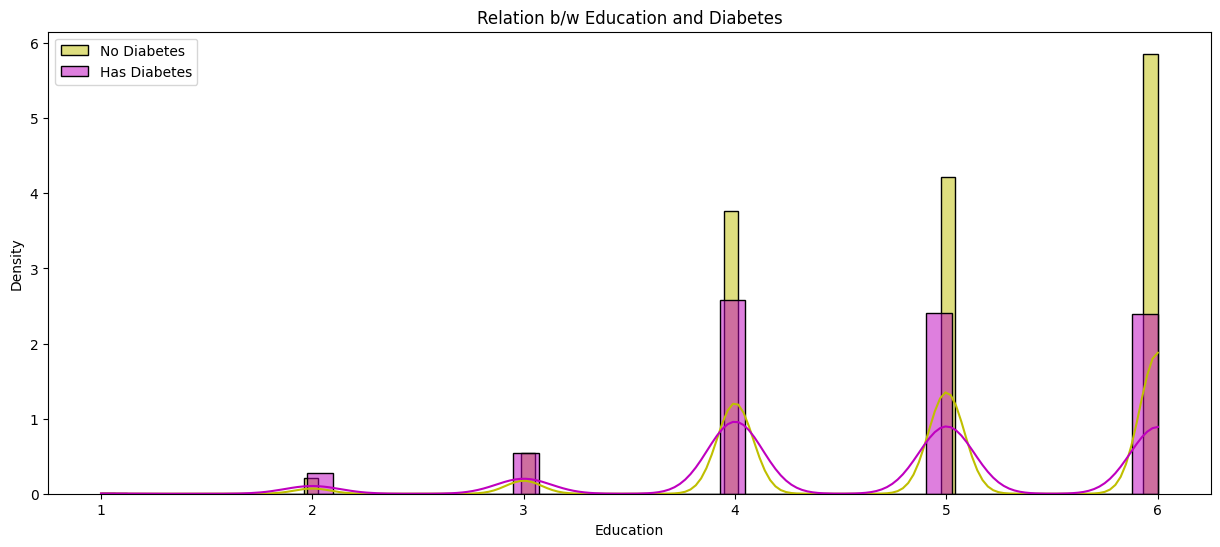

In [26]:
plt.figure(figsize=(15, 6))

# Histogram for No Diabetic group
sns.histplot(df.Education[df.Diabetes == 0], color="y", label="No Diabetes", kde=True, stat="density")

# Histogram for Diabetic group
sns.histplot(df.Education[df.Diabetes == 1], color="m", label="Has Diabetes", kde=True, stat="density")

plt.title("Relation b/w Education and Diabetes")
plt.xlabel("Education")
plt.ylabel("Density")
plt.legend()
plt.show()


Conclusions:
- There are more people with higher levels of education.
- There are more people without diabetes who have higher levels of education.

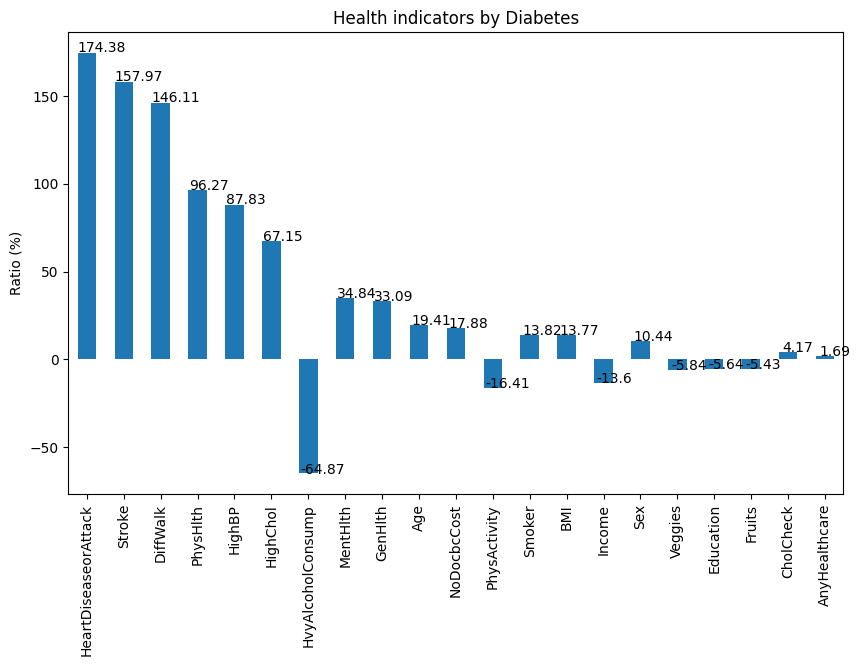

Diabetes,0,1,Ratio (%)
HeartDiseaseorAttack,0.081579,0.223837,174.38
Stroke,0.036095,0.093113,157.97
DiffWalk,0.151824,0.373650,146.11
PhysHlth,4.080442,8.008491,96.27
HighBP,0.400536,0.752344,87.83
HighChol,0.400505,0.669459,67.15
HvyAlcoholConsump,0.067487,0.023706,-64.87


In [27]:
# Average of health indicators for data points with and w/o diabetes
avg_indicators_diabetes_group = df.groupby('Diabetes').mean().T
avg_indicators_diabetes_group['Ratio (%)'] = round((avg_indicators_diabetes_group[1] - avg_indicators_diabetes_group[0]) / avg_indicators_diabetes_group[0] * 100, 2)

# Sort values by the absolute value of the 'Ratio (%)' column
avg_diabetes_group_sorted = avg_indicators_diabetes_group.reindex(avg_indicators_diabetes_group['Ratio (%)'].abs().sort_values(ascending=False).index)

# Show the values that on average are greater (in abs()) then 50 % compared between having and not having diabetes
ax = avg_diabetes_group_sorted['Ratio (%)'].plot(kind='bar', figsize=(10,6), title="Health indicators by Diabetes")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel("Ratio (%)")
plt.show()
avg_diabetes_group_sorted[avg_diabetes_group_sorted['Ratio (%)'].abs() > 50]



Due to many features being binary, to see where there are bigger differences between the indicators averages, a ratio column is added, showing that the:


 **HeartDiseaseorAttack, Stroke, DiffWalk, PhysHlth, HighBP, HighChol and HvyAlcoholConsump** have a greater than 50% average difference between the ones where there is/isn't diabetes.

In [60]:
# Calculate the percentage of people with and without diabetes who do or don't heavily drink
hvy_alcohol_diabetes = df.groupby(['HvyAlcoholConsump', 'Diabetes']).size().unstack()
hvy_alcohol_diabetes['Total'] = hvy_alcohol_diabetes[0] + hvy_alcohol_diabetes [1]
hvy_alcohol_diabetes['ratio_w_db'] = round(hvy_alcohol_diabetes[1] / hvy_alcohol_diabetes['Total'] * 100,2)
hvy_alcohol_diabetes


Diabetes,0,1,Total,ratio_w_db
HvyAlcoholConsump,,,,
0,181259,34265,215524,15.90
1,13118,832,13950,5.96


------
### Categorical Analysis


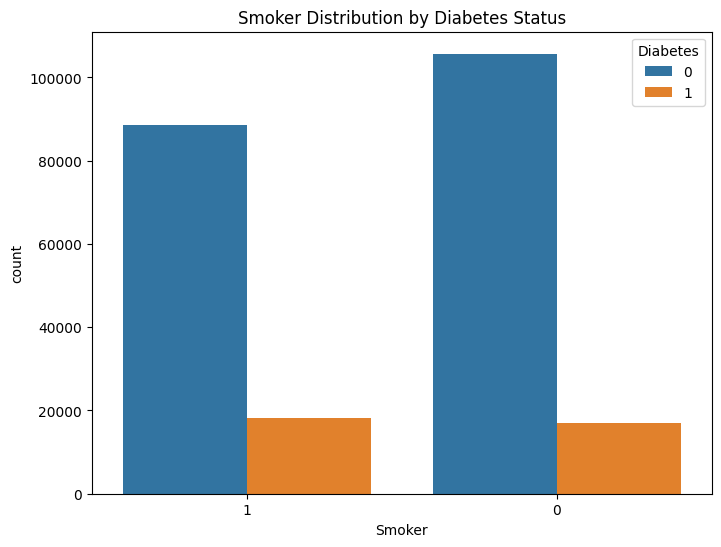

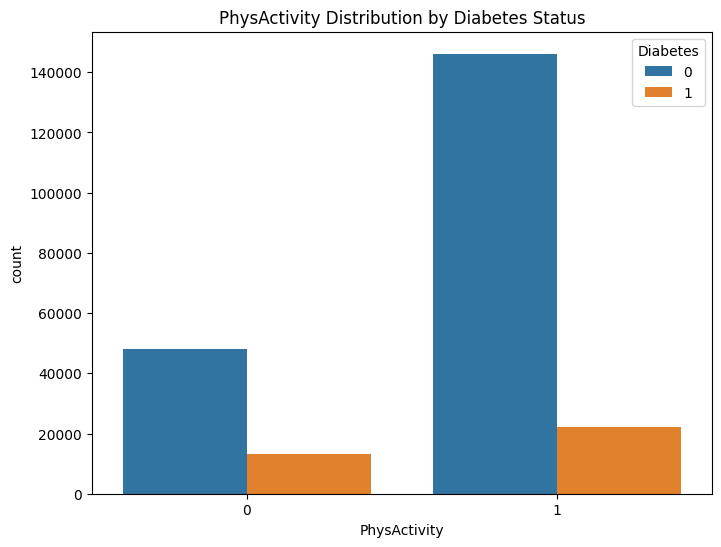

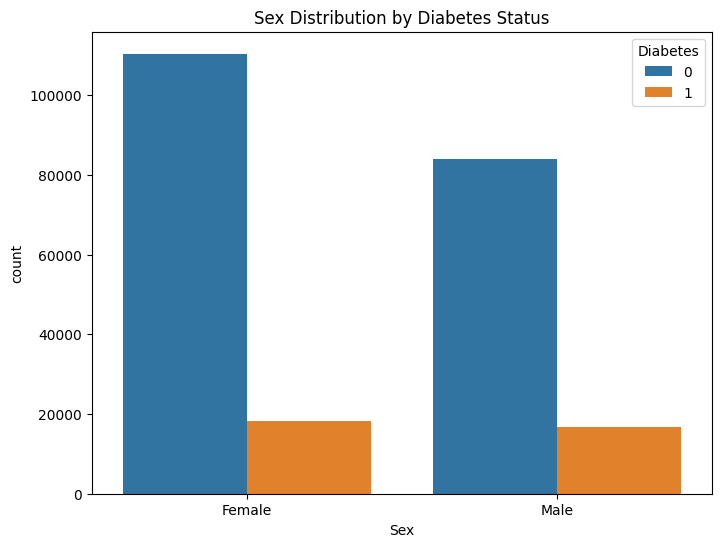

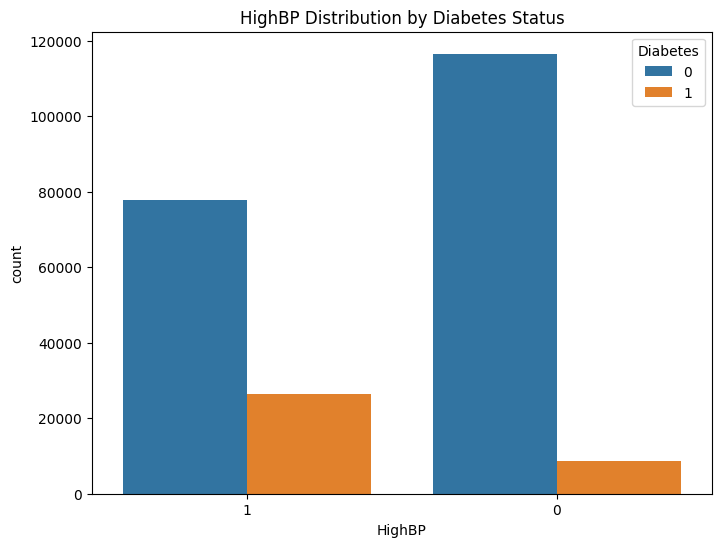

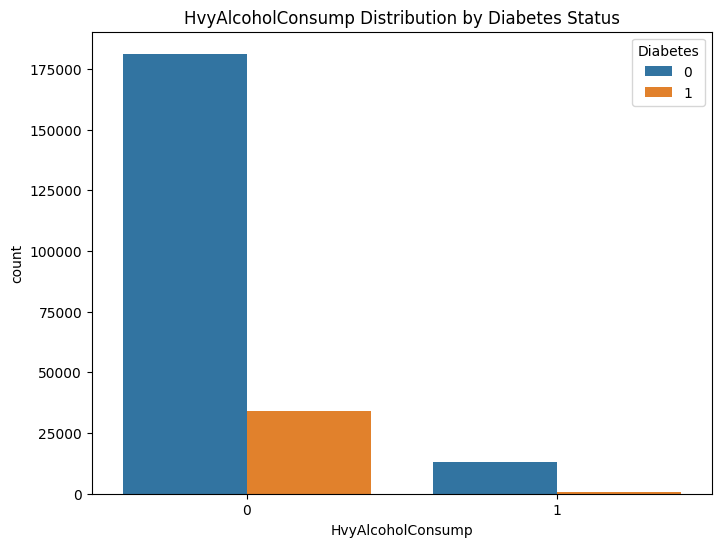

In [37]:
categorical_cols = ['Smoker', 'PhysActivity', 'Sex', 'HighBP']
label_map = {'Sex': {0: 'Female', 1: 'Male'}}
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    data_mapped = df[col].map(label_map.get(col, {0: '0', 1: '1'}))
    ax = sns.countplot(x=data_mapped, data=df, hue='Diabetes')
    plt.title(f"{col} Distribution by Diabetes Status")
    plt.show()

### Feature Interactions

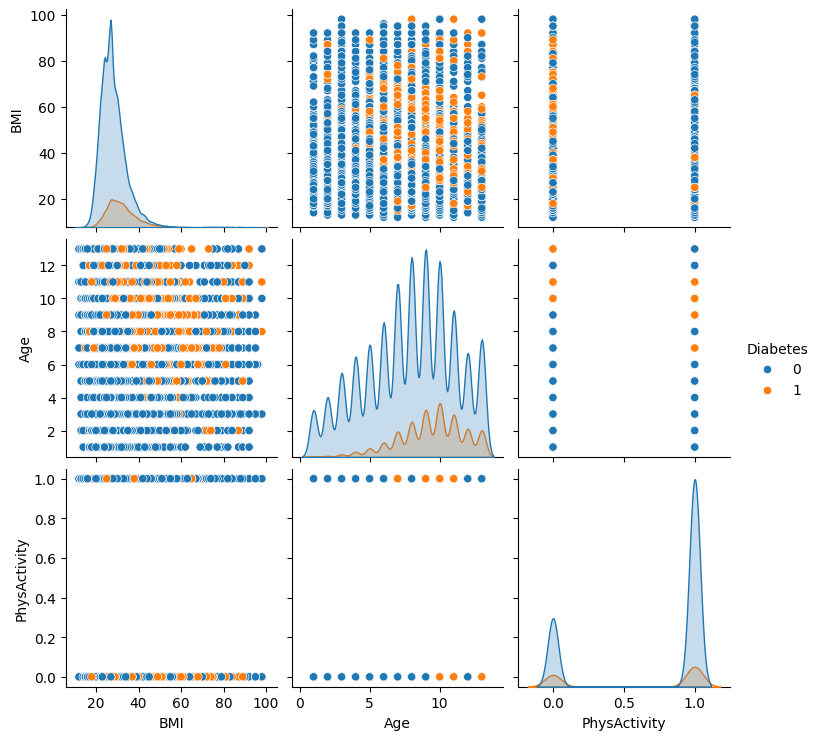

In [29]:
sns.pairplot(df, hue='Diabetes', vars=['BMI', 'Age', 'PhysActivity'])
plt.show()

## 2.4. Correlation Analysis

#### 2.4.1 HeatMap

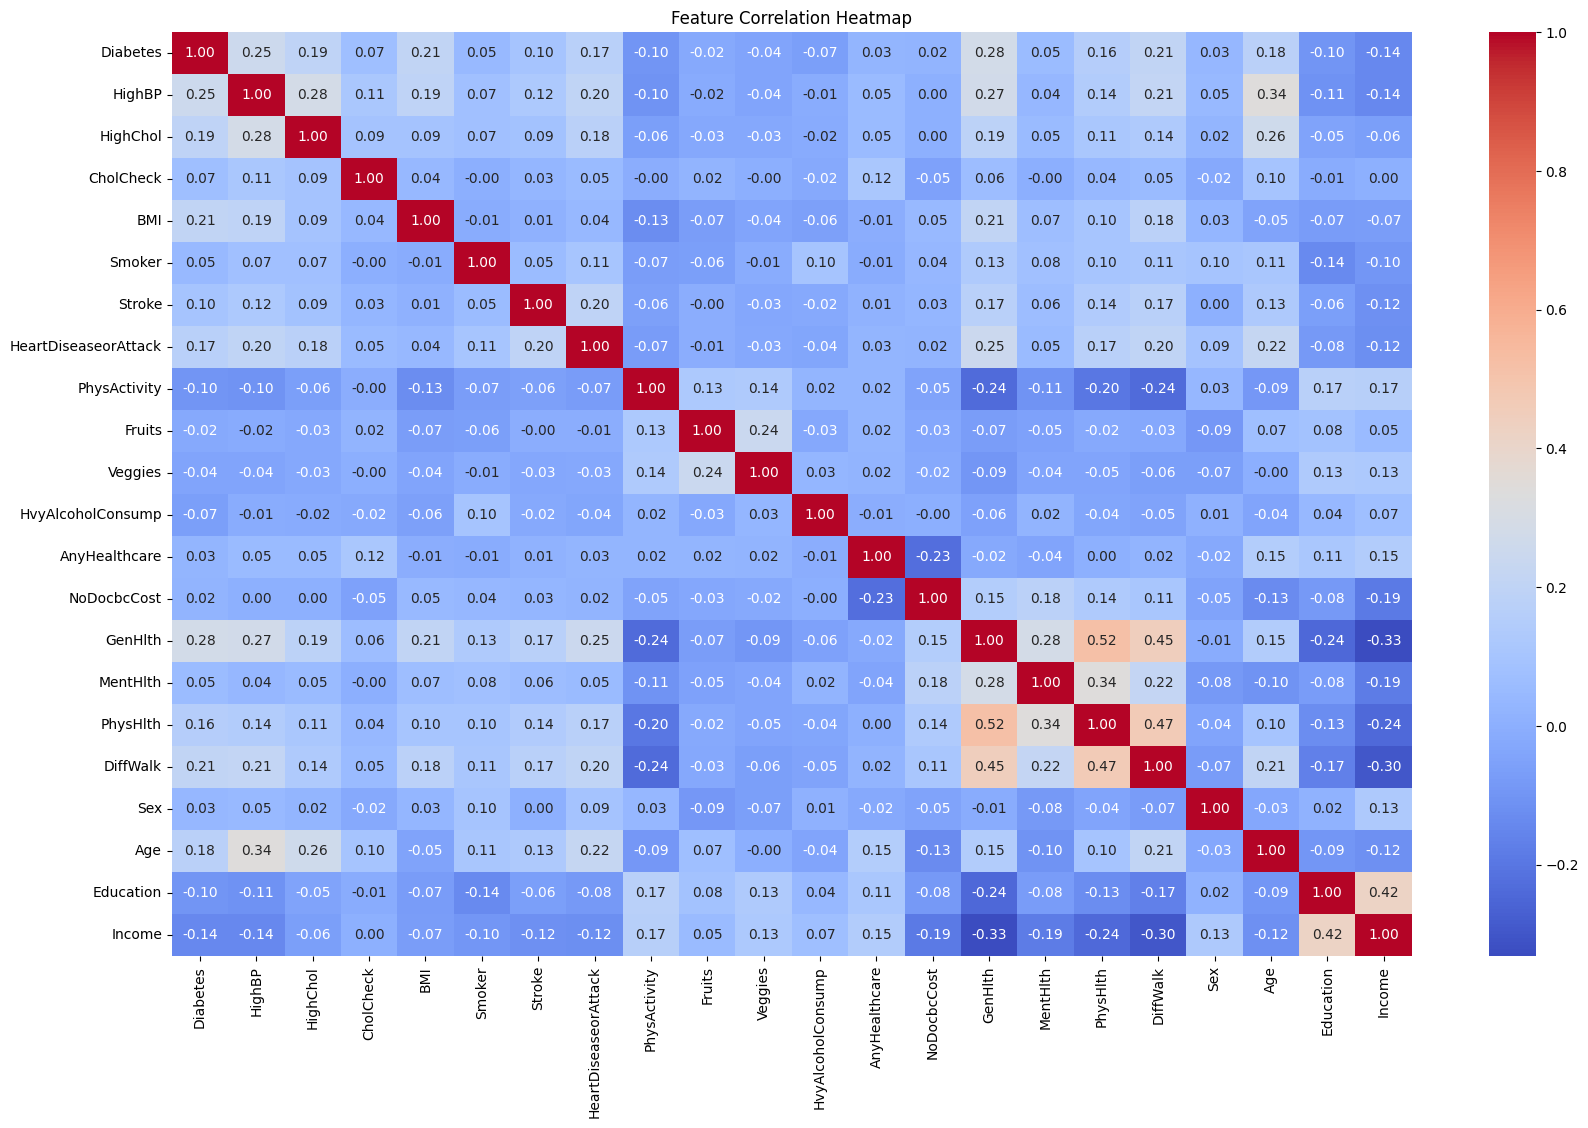

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [31]:
# Find features with highest correlation amongst themselves (above a certain threshold eg 0.4, ignore the obvious 1.0 of feature with themselves)
threshold = 0.25
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(df.corr().columns)):
    for j in range(i):
        if abs(df.corr().iloc[i, j]) > threshold:
            high_corr_pairs.append((df.corr().columns[i], df.corr().columns[j], df.corr().iloc[i, j]))

# Sort the pairs by correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Display the pairs
high_corr_pairs


[('PhysHlth', 'GenHlth', 0.5164759642743163),
 ('DiffWalk', 'PhysHlth', 0.4668516590118641),
 ('DiffWalk', 'GenHlth', 0.4466961766503743),
 ('Income', 'Education', 0.41904493472235127),
 ('PhysHlth', 'MentHlth', 0.34019115574480346),
 ('Age', 'HighBP', 0.3398020363447761),
 ('Income', 'GenHlth', -0.331782491396322),
 ('Income', 'DiffWalk', -0.2990641710036447),
 ('HighChol', 'HighBP', 0.2839625580784498),
 ('MentHlth', 'GenHlth', 0.2838216907224818),
 ('GenHlth', 'Diabetes', 0.27693981766899534),
 ('GenHlth', 'HighBP', 0.2727836908488885),
 ('Age', 'HighChol', 0.263840951111218),
 ('HighBP', 'Diabetes', 0.2543180248133474)]

In [34]:
high_corr_pairs = [i for i in high_corr_pairs if abs(i[2]) >= 0.3]
print(f"{len(high_corr_pairs)} features pairs with |correlation| > 0.3 ")
high_corr_pairs


7
7 features pairs with |correlation| > 0.3 


[('PhysHlth', 'GenHlth', 0.5164759642743163),
 ('DiffWalk', 'PhysHlth', 0.4668516590118641),
 ('DiffWalk', 'GenHlth', 0.4466961766503743),
 ('Income', 'Education', 0.41904493472235127),
 ('PhysHlth', 'MentHlth', 0.34019115574480346),
 ('Age', 'HighBP', 0.3398020363447761),
 ('Income', 'GenHlth', -0.331782491396322)]

#### 2.4.2 Correlation of Features with Target Variable

<Axes: title={'center': 'Correlation with Diabetes'}>

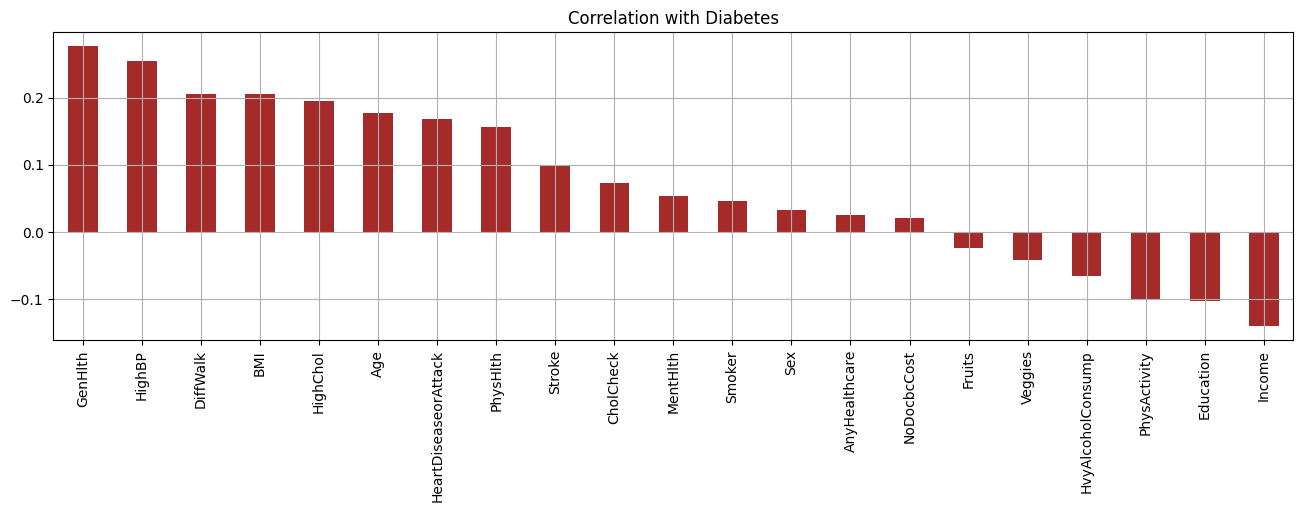

In [38]:
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(16, 4), title="Correlation with Diabetes",color="Brown")

##### High Correlated Features with target variable

In [56]:
high_corr = df.corr()
#high_corr_features = high_corr.index[abs((high_corr["Diabetes"])) >= 0.1]
high_corr_features = [(indicator, high_corr["Diabetes"][indicator]) for indicator in high_corr.index if abs(high_corr["Diabetes"][indicator]) >= 0.1]

high_corr_features.sort(key=lambda tup : abs(tup[1]),reverse=True)
high_corr_features[1:] # drop diabetes

[('GenHlth', 0.27693981766899534),
 ('HighBP', 0.2543180248133474),
 ('DiffWalk', 0.205302185959769),
 ('BMI', 0.20508596365510764),
 ('HighChol', 0.19494410908594687),
 ('Age', 0.1772633472828259),
 ('HeartDiseaseorAttack', 0.1682131732759376),
 ('PhysHlth', 0.15621082600259353),
 ('Income', -0.14065873978158366),
 ('Education', -0.102686152138843),
 ('PhysActivity', -0.10040433162205266)]

##### Low Correlated Features with target variable

In [40]:
low_corr = df.corr()
low_corr_features = low_corr.index[abs(low_corr["Diabetes"]) < 0.05]
low_corr_features

Index(['Smoker', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Sex'], dtype='object')

## 3. Data Preprocessing

### 3.1 Feature Selection

In [7]:
# Dropping low correlated features

low_corr = ['Smoker', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Sex']
df.drop(low_corr , axis= 1 ,inplace=True)

### 3.2 Data Splitting for Training and Testing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target Variable
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 4. Machine Learning Algorithms

### Before Tuning

In [ ]:
models = {
    "Support Vector Machine": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(), 
}

results = []

for name, model in models.items():
    # Train model
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

    # Metrics
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("-" * 50)

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Print sorted results
print("Summary of Results:")
# print(df_results.to_string(index=False))

print(df_results)


### HyperParameter Tuning Function

In [12]:
results = []

def hyperparameter_tuning(model, param_dist, X_train, y_train, X_test, y_test, cv=5, n_candidates=50, scoring='accuracy'):
    halving_random_search = HalvingRandomSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_candidates=n_candidates,
        cv=cv,
        scoring=scoring,
        verbose=2,
        n_jobs=-1,
        random_state=42,
    )
    halving_random_search.fit(X_train, y_train)

    # Extract the best model and parameters
    best_model = halving_random_search.best_estimator_
    best_params = halving_random_search.best_params_

    print(f"Best Model Parameters: {best_params}")
    print(f"Best {model.__class__.__name__} Score: {halving_random_search.best_score_:.4f}")
    print(f"Best {model.__class__.__name__} Estimator: {best_model}")

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "f1_score": f1_score(y_test, y_pred, average='weighted', zero_division=0),
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": cm
    }

    # Display metrics
    print("\nEvaluation Metrics on Test Set:")
    for metric, value in metrics.items():
        if metric == "confusion_matrix":
            print(f"\n{metric}:\n{value}")
        elif metric == "classification_report":
            print(f"\n{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save the model name, accuracy, and other relevant metrics
    result = {
        "model": model.__class__.__name__,
        "best_accuracy": halving_random_search.best_score_,
        "test_accuracy": metrics["accuracy"],
        "params": best_params
    }
    results.append(result)
    
    return best_model, best_params, metrics


### 4.1 Logistic Regression

In [ ]:
model = LogisticRegression()

param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga', 'lbfgs'],  
    'max_iter': [100, 200, 300],  
    'penalty': ['l1', 'l2'],  
}

best_model, best_params, metrics = hyperparameter_tuning(
    model=model,
    param_dist=param_dist,
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test,   
    cv=5,             
    n_candidates=20,        
    scoring='accuracy'
)

### 4.2 Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

best_model, best_params, metrics = hyperparameter_tuning(
    model=model,
    param_dist=param_dist,
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test,   
    cv=5,             
    n_candidates=20,        
    scoring='accuracy'
)

### 4.3 Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

best_model, best_params, metrics = hyperparameter_tuning(
    model=model,
    param_dist=param_dist,
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test,   
    cv=5,             
    n_candidates=20,        
    scoring='accuracy'
)

### 4.4 KNeighborsClassifier Model (KNN)

In [ ]:
model = KNeighborsClassifier()

param_dist = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  
    'leaf_size': [20, 30, 40, 50],  
}

best_model, best_params, metrics = hyperparameter_tuning(
    model=model,
    param_dist=param_dist,
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test,   
    cv=5,             
    n_candidates=20,        
    scoring='accuracy'
)

### 4.5 Support Vector Machine (SVM)

In [ ]:
model = SVC()

param_dist = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [3, 4, 5],  
    'gamma': ['scale', 'auto'],  
}

best_model, best_params, metrics = hyperparameter_tuning(
    model=model,
    param_dist=param_dist,
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test,   
    cv=5,             
    n_candidates=20,        
    scoring='accuracy'
)

### 4.6 Gradient Boosting

In [ ]:
model = GradientBoostingClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'warm_start': [True, False],
    'n_iter_no_change': [5, 10, 20],
}

best_model, best_params, metrics = hyperparameter_tuning(
    model=model,
    param_dist=param_dist,
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test,   
    cv=5,             
    n_candidates=20,        
    scoring='accuracy'
)

## 5. Results

In [ ]:
# Dataframe for results in order of best test accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="test_accuracy", ascending=False)

print("\nModel Comparison (Sorted by Test Accuracy):")
print(results_df[["model", "test_accuracy", "best_accuracy"]])